# SOM

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data preparation

In [2]:
# Importing the dataset
df = pd.read_csv('bank.csv')
df = df.drop(['id'], axis=1)
df

,age,sex,income,married,children,car,mortgage,delays
0,48,FEMALE,17546.00,NO,1,NO,NO,YES
1,40,MALE,30085.10,YES,3,YES,YES,NO
2,51,FEMALE,16575.40,YES,0,YES,NO,YES
3,23,FEMALE,20375.40,YES,3,NO,NO,YES
4,57,FEMALE,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...
595,61,FEMALE,47025.00,NO,2,YES,YES,NO
596,30,FEMALE,9672.25,YES,0,YES,NO,YES
597,31,FEMALE,15976.30,YES,0,YES,NO,YES
598,29,MALE,14711.80,YES,0,NO,YES,YES


In [3]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [4]:
# Encoding categorical data
df = encoding_char(df)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df_sc = sc.transform(df)

In [6]:
X = df_sc[:, [0, 2, 7]]

In [7]:
X

array([[0.6122449 , 0.21563448, 0.        ],
       [0.44897959, 0.43139475, 1.        ],
       [0.67346939, 0.19893337, 0.        ],
       ...,
       [0.26530612, 0.18862466, 0.        ],
       [0.2244898 , 0.16686641, 0.        ],
       [0.40816327, 0.37265867, 1.        ]])

## Som model

In [12]:
#! pip install SimpSOM

In [8]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 15, X, PBC=True)
net.train(0.01, 2000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


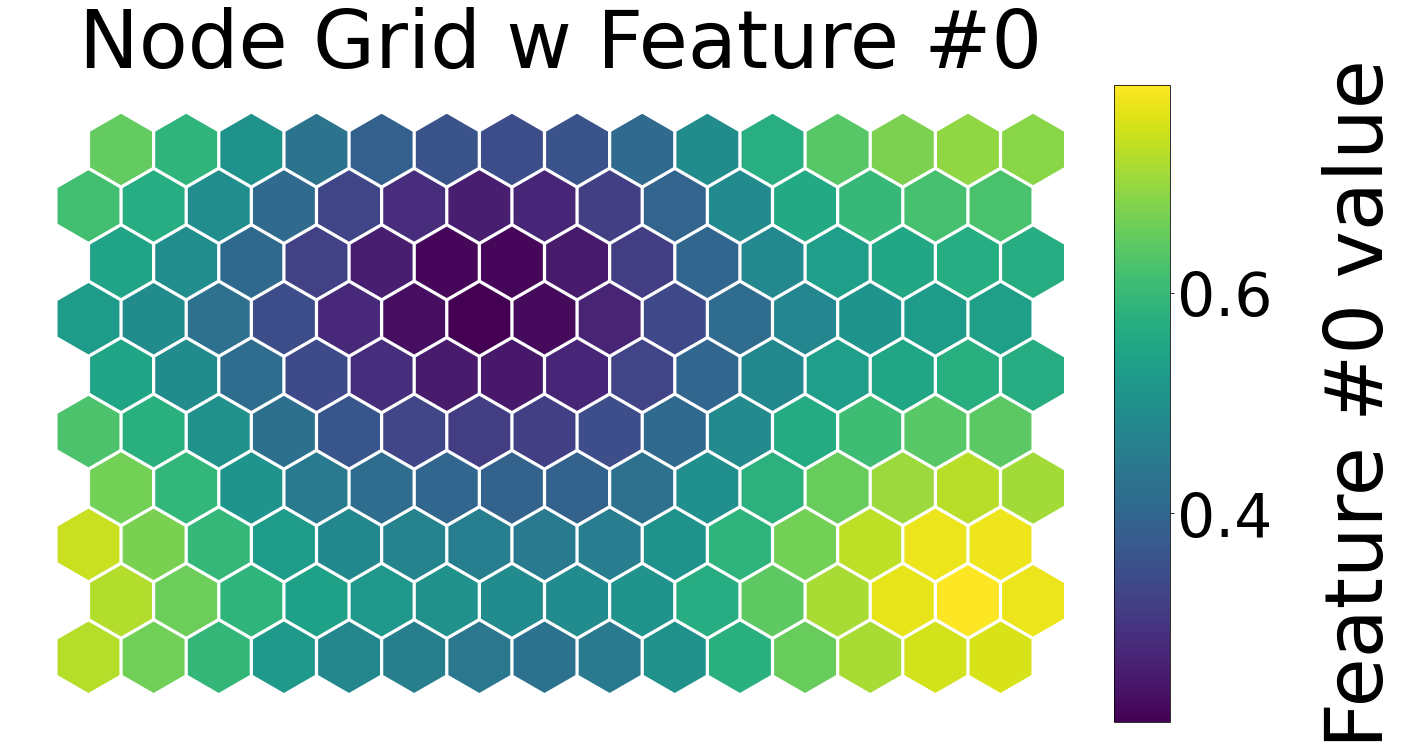

In [9]:
net.nodes_graph(colnum=0)

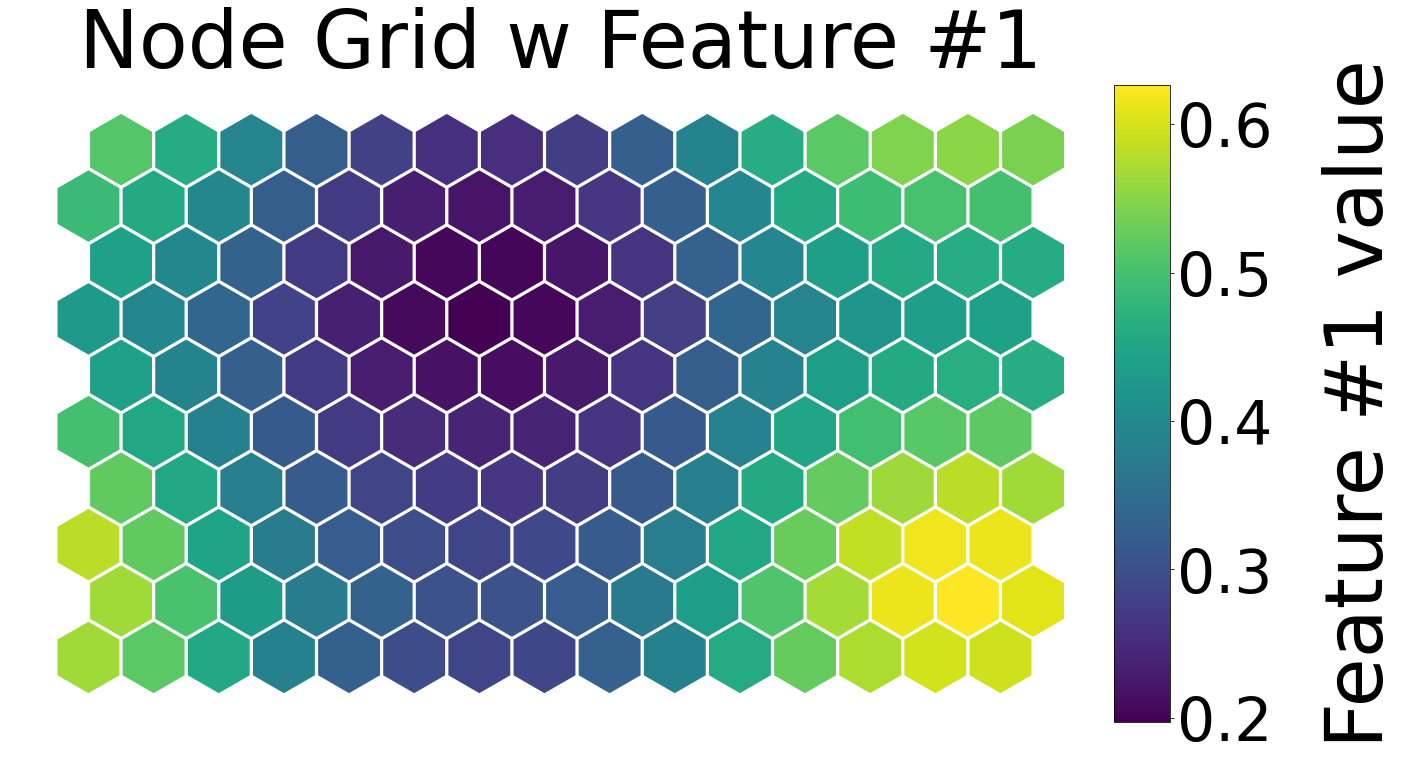

In [10]:
net.nodes_graph(colnum=1)

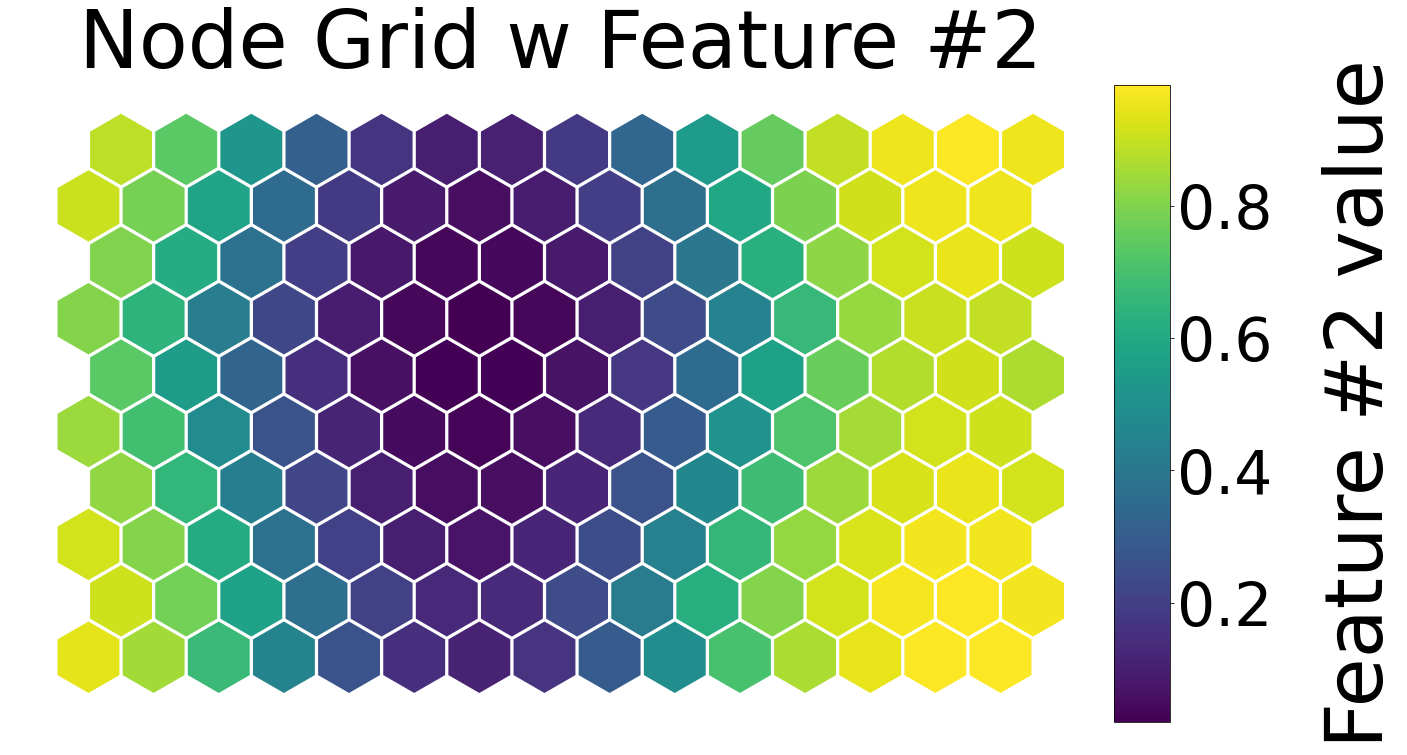

In [11]:
net.nodes_graph(colnum=2)

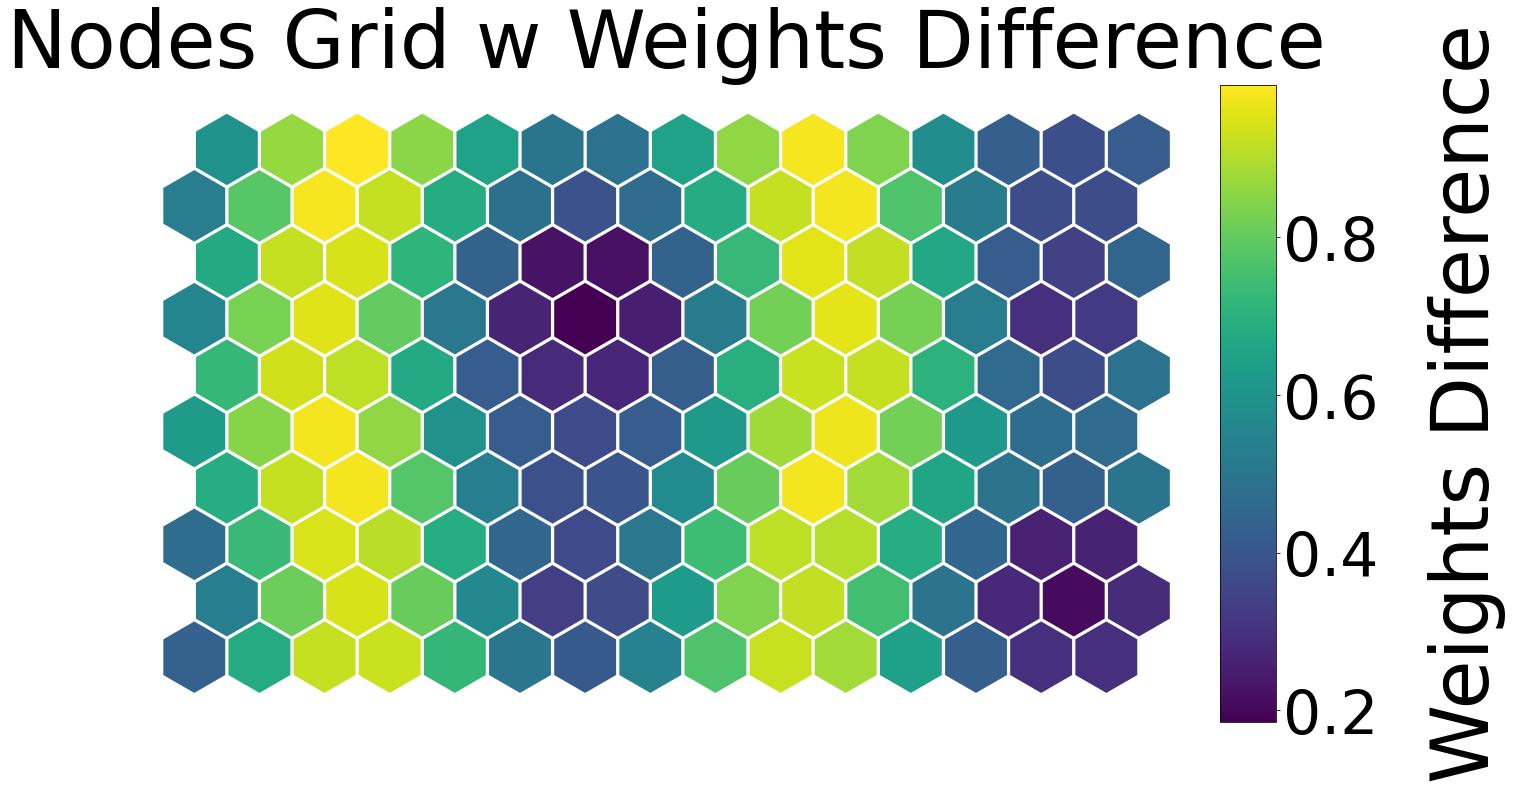

In [12]:
net.diff_graph()

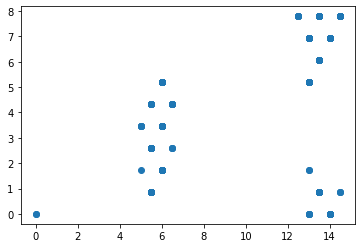

In [13]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

## kmeans to SOM

In [14]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
km_som = KMeans(n_clusters=2, random_state=0).fit(prj)

In [15]:
def plot_2d(X, label_list_cluster):
    plt.figure(figsize=(7, 7))
    plt.subplots_adjust(bottom=0.1)
    c = label_list_cluster
    plt.scatter(X[:, 0], X[:, 1], c=c, cmap='rainbow', label='True Position')
    plt.show()

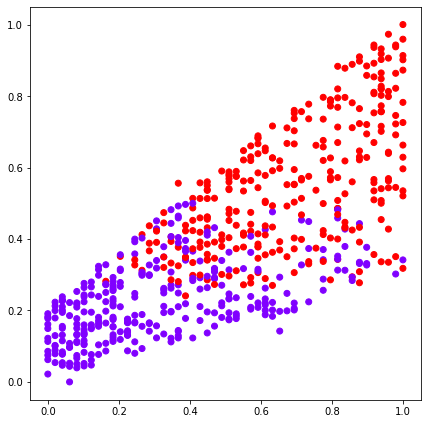

In [17]:
plot_2d(df_sc[:, [0, 2]],km_som.labels_)

In [29]:
def plot_2d_labels(X, label_list_cluster, label_list):
    plt.figure(figsize=(20, 15))
    plt.subplots_adjust(bottom=0.1)
    c = label_list_cluster
    plt.scatter(X[:, 0], X[:, 1], c=c, cmap='rainbow', label='True Position')

    for label, x, y in zip(label_list, X[:, 0], X[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    plt.show()

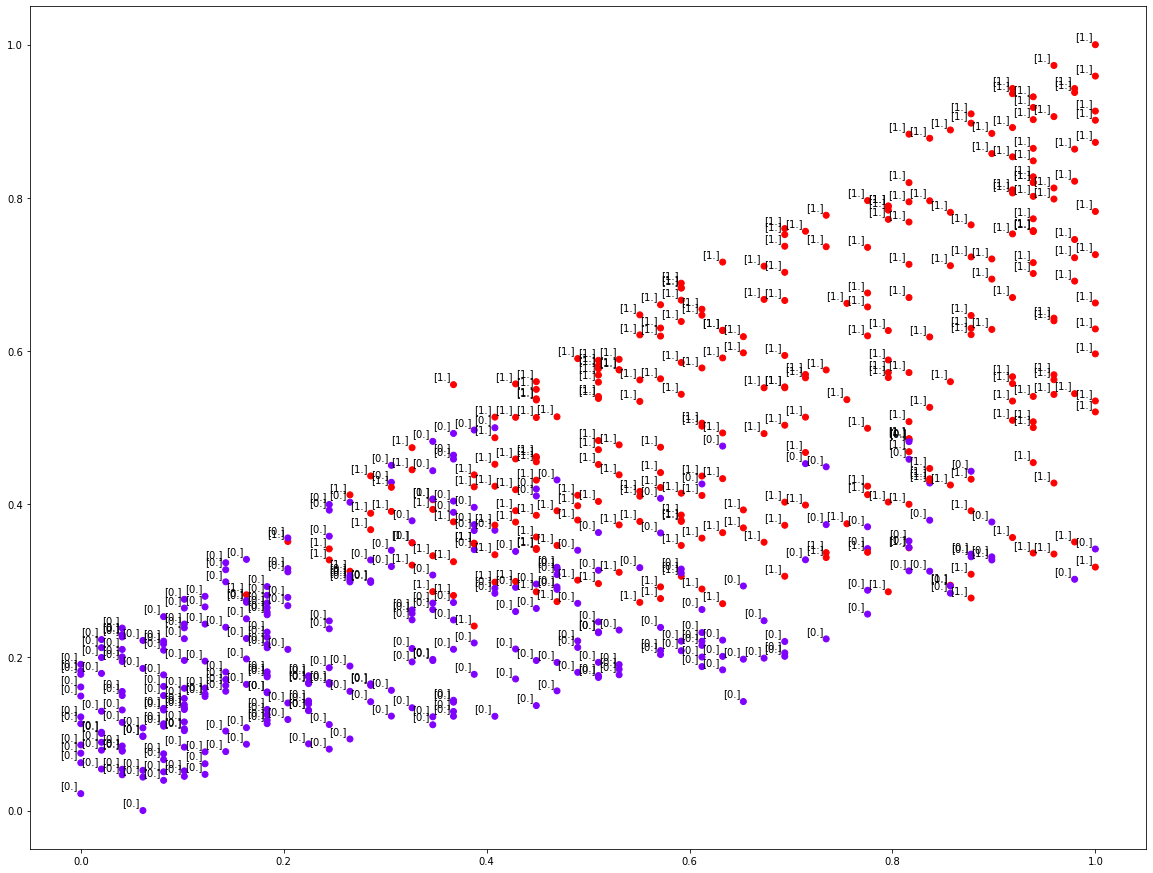

In [30]:
plot_2d_labels(df_sc[:, [0, 2]],km_som.labels_,df_sc[:, [7]].round())

## Results matching

In [18]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc2 = obj['hc']

In [19]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc2,km_som.labels_).round(3)

0.987

In [22]:
# Importing km clusters
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km2 = obj['km']

In [24]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km2,km_som.labels_).round(3)

0.987